# Addis Ababa Dataset

## Extract CSV File

In [1]:
import pandas
import numpy as np

data = pandas.read_csv('Addis_data.csv')

### Change Columns to Readable Features

In [2]:
import util

data.columns = util.NEW_NAMES

### Change Unordinary Field Values to NA

In [3]:
for i in range(len(data)):
    for feature in data.columns:
        if data.loc[i, feature] in [-999, -888, -777, -333]:
            data.loc[i, feature] = np.nan

### Get High-level Statistics about Data

In [4]:
data.describe()

,lat,long,water_source_drinking,water_location_drinking,water_interruptions_drinking,water_unavailable,water_treated,water_quality_concerns,water_satisfaction,water_drinking_cooking_same,...,healthcare_distance,healthcare_satisfaction,education_used,bl_sd45,education_distance,satisfaction_num_classrooms,satisfaction_num_textbooks,satisfaction_cost_textbooks,satisfaction_education,ID
count,3591.000000,3591.000000,3572.000000,3591.000000,3547.000000,2352.000000,3587.000000,3591.000000,3577.000000,3591.000000,...,3305.000000,3299.000000,3591.000000,3250.000000,3239.000000,2620.000000,2601.000000,2594.000000,2813.000000,3591.000000
mean,8.896812,38.848555,2.101904,2.374826,1.333239,12.018707,1.671034,1.692008,3.254683,1.070175,...,4.542325,2.837830,1.532164,1.776870,19.899660,2.469466,2.486351,2.182729,2.571276,1796.000000
std,0.249701,0.276938,2.184497,0.635856,0.471438,8.516833,0.469903,0.461728,1.340617,0.255478,...,9.476558,1.116642,0.499034,2.167006,15.998305,0.920796,0.929798,0.867502,0.934361,1036.776736
min,6.911369,35.617809,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000100,1.000000,1.000000,0.000200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.743141,38.667704,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,0.600000,10.000000,2.000000,2.000000,2.000000,2.000000,898.500000
50%,8.934908,38.824028,1.000000,2.000000,1.000000,10.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,15.000000,2.000000,2.000000,2.000000,2.000000,1796.000000
75%,9.058959,39.006168,2.000000,3.000000,2.000000,18.250000,2.000000,2.000000,4.000000,1.000000,...,4.000000,4.000000,2.000000,2.000000,30.000000,3.000000,3.000000,2.000000,3.000000,2693.500000
max,12.217216,45.585590,11.000000,3.000000,2.000000,30.000000,2.000000,2.000000,5.000000,2.000000,...,200.000000,5.000000,2.000000,42.000000,150.000000,5.000000,5.000000,5.000000,5.000000,3591.000000


### Useful Categories of Features

In [5]:
water = ['water_source_drinking', 'water_location_drinking','water_interruptions_drinking','water_unavailable',
         'water_treated','water_quality_concerns','water_satisfaction','water_drinking_cooking_same',
         'water_source_cooking','water_location_cooking','water_distance_cooking','water_interruptions_cooking']

drainage = ['toilet_type','pit_latrine_depth','toilet_shared','toilet_num_households','garbage_disposal',
            'garbage_distance','garbage_regular','garbage_frequency','waste_water_disposal','storm_drain',
            'other_drain']

electricity = ['electricity_access','electricity_source','electricity_payment','electricity_always',
               'electricity_interruptions','electricity_outages_length','lighting_source','cooking_fuel']

roads = ['road_type','road_safety','road_rainy_season','distance_piazza','distance_leghar','distance_minibus',
         'distance_motorcycle','distance_light_rail']

healthcare = ['healthcare_used','healthcare_distance','healthcare_satisfaction']

education = ['education_used','bl_sd45','education_distance','satisfaction_num_classrooms',
             'satisfaction_num_textbooks','satisfaction_cost_textbooks','satisfaction_education']

### Correlations

(3591, 52)
(52, 52)


/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


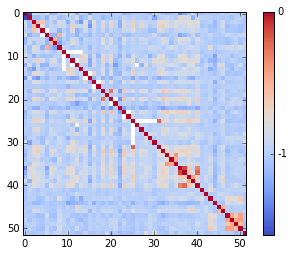

In [6]:
%matplotlib inline

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def plot_correlations(data):
    fig, ax = plt.subplots()

    cax = ax.imshow(data.corr().values, interpolation='nearest', cmap=cm.coolwarm)
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    cbar.ax.set_yticklabels(['-1', '0', '1'])

print data.shape
print data.corr().shape

plot_correlations(data)

#### Which are the high value correlations?

In [7]:
def get_correlations(data, threshold):
    correlation_data = data.corr()

    for i in range(len(correlation_data.columns)):
        for j in range(i, len(correlation_data.columns)):
            feature1 = correlation_data.columns[i]
            feature2 = correlation_data.columns[j]
            if ((correlation_data[feature1][feature2] >= threshold) or (correlation_data[feature1][feature2] <= -threshold)) and (feature1 != feature2):
                print "%s\t%s" % (feature1, feature2)
                
get_correlations(data, 0.3)

print data

print data.cov(min_periods = 1)

lat	long
water_location_drinking	water_location_cooking
water_location_drinking	garbage_regular
water_location_drinking	electricity_access
water_interruptions_drinking	water_source_cooking
water_interruptions_drinking	water_interruptions_cooking
water_source_cooking	water_interruptions_cooking
water_distance_cooking	distance_leghar
water_distance_cooking	distance_light_rail
water_distance_cooking	healthcare_distance
water_distance_cooking	bl_sd45
garbage_regular	storm_drain
storm_drain	road_rainy_season
electricity_interruptions	electricity_outages_length
road_safety	road_rainy_season
distance_piazza	distance_leghar
distance_piazza	distance_light_rail
distance_leghar	distance_light_rail
healthcare_distance	bl_sd45
education_used	satisfaction_num_classrooms
education_used	satisfaction_num_textbooks
education_used	satisfaction_cost_textbooks
education_used	satisfaction_education
satisfaction_num_classrooms	satisfaction_num_textbooks
satisfaction_num_classrooms	satisfaction_cost_textbooks

## Principal Component Analysis